# Rasterio Introduction
Documentation for this library could be accesses using this [Link]()

In [1]:
import rasterio
rasterio.__version__
import matplotlib.pyplot as plt

### Reading a raster data

In [2]:
img1 = rasterio.open('Demo1.tif')
img1

C:\Users\psingh24\Miniconda3\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='Demo1.tif' mode='r'>

In [3]:
# Read the tif file as numpy array
img_data1 = img1.read()

In [4]:
img_data1.shape

(1, 960, 1280)

### Reading metadata of the raster

In [5]:
# Getting the number of bands in the image
print('No. of bands in the image is: ', img1.count)

No. of bands in the image is:  1


In [6]:
print('Width of image is: ', img1.width)

Width of image is:  1280


In [7]:
print('Height of image is: ', img1.height)

Height of image is:  960


In [8]:
img_data1.dtype

dtype('uint16')

In [9]:
print('Minimum value in the img_data1 is: ', img_data1.min())

Minimum value in the img_data1 is:  7328


In [10]:
print('Maximum value in the img_data1 is: ', img_data1.max())

Maximum value in the img_data1 is:  65520


In [11]:
# reading whole meta data 
img1.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1280,
 'height': 960,
 'count': 1,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

### Visualization of raster data

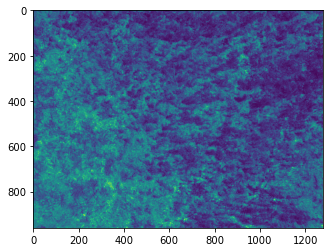

<AxesSubplot:>

In [12]:
from rasterio.plot import show, show_hist

show(img1)

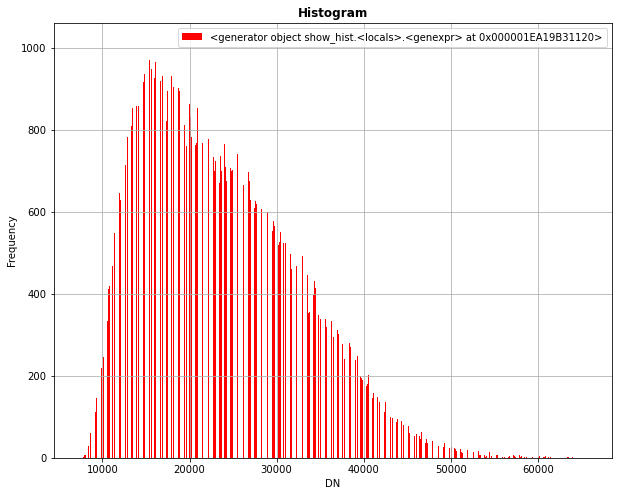

In [13]:
plt.figure(figsize = (10,8))
show_hist(img1, bins = 10000)

### Writing raster data 
process to create a new .tif file

In [14]:
with rasterio.open(r'output/Output1.tif', 'w',
                  driver = img1.driver,
                  height = img1.width,
                  width = img1.height,
                  count = img1.count,
                  crs = img1.crs,
                  transform = img1.transform, 
                  dtype = img_data1.dtype) as dst:
    dst.write(img_data1)

C:\Users\psingh24\Miniconda3\lib\site-packages\rasterio\__init__.py:238: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


In [15]:
# with rasterio.open(r'output/Output1.tif', 'w',
#                   driver = img1.driver,
#                   height = img1.width,
#                   width = img1.height,
#                   count = img1.count,
#                   crs = img1.crs,
#                   transform = img1.transform, 
#                   dtype = img_data1.dtype) as dst:
#     dst.write(data1)

### Reading a new .tif file
The image read is a RGB image

In [16]:
img2 = rasterio.open('June8.tif')
img2

<open DatasetReader name='June8.tif' mode='r'>

In [17]:
img_data2 = img2.read()
img_data2.shape

(3, 17977, 11241)

In [18]:
# Getting the number of bands in the image
print('No. of bands in the image is: ', img2.count)

No. of bands in the image is:  3


In [19]:
print('Width of image is: ', img2.width)

Width of image is:  11241


In [20]:
print('Height of image is: ', img2.height)

Height of image is:  17977


In [21]:
print('Minimum value in the data2 is: ', img_data2.min())

Minimum value in the data2 is:  0


In [22]:
print('Maximum value in the data2 is: ', img_data2.max())

Maximum value in the data2 is:  255


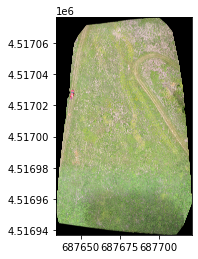

<AxesSubplot:>

In [23]:
show(img2)

In [24]:
# Reading different bands in an image separetely
img2a = img2.read(1)
img2b = img2.read(2)
img2c = img2.read(3)

In [25]:
# results is a 3d array
img_data2.shape

(3, 17977, 11241)

In [26]:
# result is a 2d array
img2a.shape

(17977, 11241)

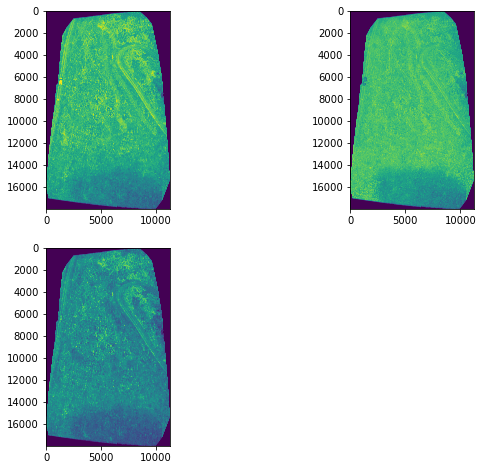

In [27]:
# Reading three different bands in sub-plots
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img2a)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2b)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img2c)
plt.show()

## NDVI - Normalized difference vegetation index
<b>NDVI is a common measure in remote sensing for agriculture — capturing how much more near infrared light is reflected compared to visible red. It helps differentiate bare soil from grass or forest, detect plants under stress, and differentiate between crops and crop stages.</b><br>
<br><b>Formula </b>= (NIR-R) / (NIR+R)

In [28]:
# Check datatype of 'img2a'
img2a.dtype

dtype('uint8')

We will convert the existing 'uint8' datatype into 'floating' datatype that will help us to tackle the round off errors in the calculation

In [29]:
# Converting the datatype
NIR = img2a.astype('f8')
R = img2b.astype('f8')

In [30]:
NIR.dtype

dtype('float64')

In [31]:
# Calculating NDVI
NDVI = (NIR - R) / (NIR + R)

C:\Users\psingh24\AppData\Local\Temp/ipykernel_324/157396717.py:2: RuntimeWarning: invalid value encountered in true_divide
  NDVI = (NIR - R) / (NIR + R)


In [32]:
NDVI.shape

(17977, 11241)

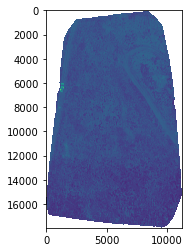

In [33]:
plt.imshow(NDVI)

## GNDVI - Green normalized difference vegetation index 
GNDVI index uses visible green instead of visible red and near infrared. Useful for measuring rates of photosynthesis and monitoring the plant stress.<br>
<b>Formula </b>= (NIR - G) / (NIR + G)

## NDRE - Normalized difference red edge index 
The normalized difference red edge index (NDRE) is a metric that can be used to analyse whether images obtained from multi-spectral image sensors contain healthy vegetation or not.<br>
<b>Formula </b> = (NIR - RedEdge) / (NIR + RedEdge)